In [1]:
import pandas as pd 
import torch 
import numpy as np 

📊 Scaled Ablation Results Analysis
Data shape: (5, 12)
Ablation range: α = 0.0 to α = 1.1
Number of conditions: 5

Actual index values: [69.33392936969155, 93.82086167800452, 52.79850746268657, 35.83780560524746, 93.14079422382672]
Column names: ['Ablated α=0.0', 'Ablated α=0.1', 'Ablated α=0.2', 'Ablated α=0.3', 'Ablated α=0.4', 'Ablated α=0.5', 'Ablated α=0.6', 'Ablated α=0.7', 'Ablated α=0.8', 'Ablated α=0.9', 'Ablated α=1.0', 'Ablated α=1.1']

First few rows:


,Ablated α=0.0,Ablated α=0.1,Ablated α=0.2,Ablated α=0.3,Ablated α=0.4,Ablated α=0.5,Ablated α=0.6,Ablated α=0.7,Ablated α=0.8,Ablated α=0.9,Ablated α=1.0,Ablated α=1.1
Original,,,,,,,,,,,,
69.333929,70.004470,71.896886,73.312472,74.325734,75.443302,76.247951,76.858888,77.425123,77.723141,78.065862,78.274475,78.334078
93.820862,93.650794,93.367347,93.140590,92.517007,92.006803,90.362812,88.945578,86.904762,84.183673,81.972789,79.138322,77.721088
52.798507,54.664179,59.514925,63.246269,65.920398,68.781095,71.206468,72.823383,75.124378,77.176617,78.482587,79.477612,79.850746
35.837806,36.791890,39.833035,42.158617,44.484198,47.167561,50.268336,52.713178,55.336911,57.781753,60.345856,63.685152,65.235540
93.140794,93.261131,93.441637,93.441637,93.261131,92.839952,92.358604,92.298436,91.877256,91.516245,91.395909,90.914561,90.734055



Updated index: ['Overall', 'Red Low (0-4)', 'Red High (5-9)', 'Green Low (0-4)', 'Green High (5-9)']

🎨 Styled Results Table:
------------------------------


,Ablated α=0.0,Ablated α=0.1,Ablated α=0.2,Ablated α=0.3,Ablated α=0.4,Ablated α=0.5,Ablated α=0.6,Ablated α=0.7,Ablated α=0.8,Ablated α=0.9,Ablated α=1.0,Ablated α=1.1
Overall,70.0%,71.9%,73.3%,74.3%,75.4%,76.2%,76.9%,77.4%,77.7%,78.1%,78.3%,78.3%
Red Low (0-4),93.7%,93.4%,93.1%,92.5%,92.0%,90.4%,88.9%,86.9%,84.2%,82.0%,79.1%,77.7%
Red High (5-9),54.7%,59.5%,63.2%,65.9%,68.8%,71.2%,72.8%,75.1%,77.2%,78.5%,79.5%,79.9%
Green Low (0-4),36.8%,39.8%,42.2%,44.5%,47.2%,50.3%,52.7%,55.3%,57.8%,60.3%,63.7%,65.2%
Green High (5-9),93.3%,93.4%,93.4%,93.3%,92.8%,92.4%,92.3%,91.9%,91.5%,91.4%,90.9%,90.7%



📈 Worst Group Accuracy Analysis:
-----------------------------------
Best worst-group accuracy: 65.2% at Ablated α=1.1
Best overall accuracy: 78.3% at Ablated α=1.1


/tmp/ipykernel_926962/882163463.py:140: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


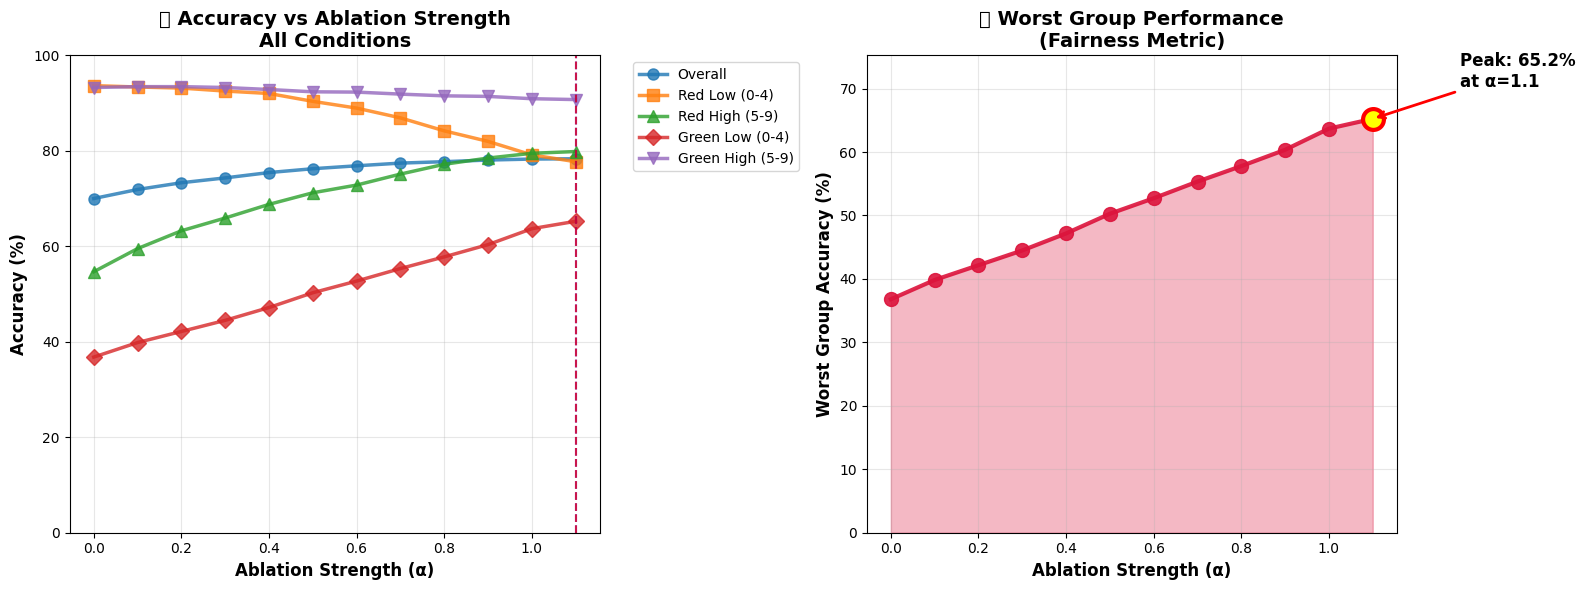


📋 Key Insights:
--------------------
• Worst group accuracy improved from 36.8% → 65.2%
• That's a +28.4 percentage point improvement!
• Best fairness achieved at α = 1.1
• Best overall performance at α = 1.1


In [2]:
# courtesy of claude ai 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

csv_path = "training_run_artifacts/scaled_results.csv"
df = pd.read_csv(csv_path, index_col=0)

print("📊 Scaled Ablation Results Analysis")
print("=" * 50)

print(f"Data shape: {df.shape}")
print(f"Ablation range: α = 0.0 to α = 1.1")
print(f"Number of conditions: {len(df)}")

print(f"\nActual index values: {list(df.index)}")
print(f"Column names: {list(df.columns)}")
print("\nFirst few rows:")
display(df.head())

# FIXED: Force the index renaming to work properly
condition_names = ["Overall", "Red Low (0-4)", "Red High (5-9)", "Green Low (0-4)", "Green High (5-9)"]

# Make sure we have the right number of conditions
if len(df) <= len(condition_names):
    df.index = condition_names[:len(df)]
else:
    # If more rows than expected, extend the names
    df.index = condition_names + [f"Condition {i}" for i in range(len(condition_names), len(df))]

print(f"\nUpdated index: {list(df.index)}")

print("\n🎨 Styled Results Table:")
print("-" * 30)

def create_styled_table(data):
    
    data_rounded = data.round(1)
    
    # Create style with custom colormap
    styled = data_rounded.style.format('{:.1f}%') \
        .background_gradient(
            cmap='RdYlGn', 
            vmin=0, 
            vmax=100,
            axis=None  
        ) \
        .set_properties(**{
            'text-align': 'center',
            'font-weight': 'bold',
            'border': '1px solid black'
        }) \
        .set_table_styles([
            {'selector': 'th', 'props': [
                ('background-color', '#2E86C1'),
                ('color', 'white'),
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('border', '1px solid black')
            ]},
            {'selector': 'td', 'props': [
                ('border', '1px solid #ddd'),
                ('padding', '8px')
            ]},
            {'selector': '', 'props': [
                ('border-collapse', 'collapse'),
                ('margin', '25px 0'),
                ('font-size', '12px'),
                ('font-family', 'Arial, sans-serif')
            ]}
        ]) \
        .set_caption("🎯 Scaled Ablation Results: Accuracy (%) vs Ablation Strength (α)")
    
    return styled

styled_df = create_styled_table(df)
display(styled_df)

print("\n📈 Worst Group Accuracy Analysis:")
print("-" * 35)

worst_group_acc = df.min(axis=0) 
best_overall_acc = df.iloc[0] 

# Find optimal ablation strength
optimal_alpha_worst = worst_group_acc.idxmax()
optimal_alpha_overall = best_overall_acc.idxmax()

print(f"Best worst-group accuracy: {worst_group_acc.max():.1f}% at {optimal_alpha_worst}")
print(f"Best overall accuracy: {best_overall_acc.max():.1f}% at {optimal_alpha_overall}")

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

alphas = [float(col.split('α=')[1]) if 'α=' in col else 0.0 for col in df.columns]
alphas[0] = 0.0  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o', 's', '^', 'D', 'v']

for i, (condition, color, marker) in enumerate(zip(df.index, colors, markers)):
    ax1.plot(alphas, df.loc[condition], 
             color=color, marker=marker, linewidth=2.5, markersize=8,
             label=condition, alpha=0.8)

ax1.set_xlabel('Ablation Strength (α)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('🎯 Accuracy vs Ablation Strength\nAll Conditions', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_ylim(0, 100)

ax1.axvline(x=float(optimal_alpha_overall.split('α=')[1]) if 'α=' in optimal_alpha_overall else 0.0, 
           color='blue', linestyle='--', alpha=0.7, label='Best Overall')
ax1.axvline(x=float(optimal_alpha_worst.split('α=')[1]) if 'α=' in optimal_alpha_worst else 0.0, 
           color='red', linestyle='--', alpha=0.7, label='Best Worst-Group')

ax2.plot(alphas, worst_group_acc, 
         color='crimson', marker='o', linewidth=3, markersize=10,
         label='Worst Group Accuracy', alpha=0.9)
ax2.fill_between(alphas, worst_group_acc, alpha=0.3, color='crimson')

peak_alpha = float(optimal_alpha_worst.split('α=')[1]) if 'α=' in optimal_alpha_worst else 0.0
peak_acc = worst_group_acc.max()
ax2.plot(peak_alpha, peak_acc, 'ro', markersize=15, markerfacecolor='yellow', 
         markeredgecolor='red', markeredgewidth=3)
ax2.annotate(f'Peak: {peak_acc:.1f}%\nat α={peak_alpha}', 
             xy=(peak_alpha, peak_acc), xytext=(peak_alpha+0.2, peak_acc+5),
             fontsize=12, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax2.set_xlabel('Ablation Strength (α)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Worst Group Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('🎯 Worst Group Performance\n(Fairness Metric)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, max(worst_group_acc) + 10)

plt.tight_layout()
plt.show()

print("\n📋 Key Insights:")
print("-" * 20)
original_worst = worst_group_acc.iloc[0]
best_worst = worst_group_acc.max()
improvement = best_worst - original_worst

print(f"• Worst group accuracy improved from {original_worst:.1f}% → {best_worst:.1f}%")
print(f"• That's a {improvement:+.1f} percentage point improvement!")
print(f"• Best fairness achieved at α = {peak_alpha}")
print(f"• Best overall performance at α = {float(optimal_alpha_overall.split('α=')[1]) if 'α=' in optimal_alpha_overall else 0.0}")

# # Calculate bias reduction metrics
# red_high_orig = df.loc["Red High (5-9)"].iloc[0]
# red_high_best = df.loc["Red High (5-9)"].max()
# green_low_orig = df.loc["Green Low (0-4)"].iloc[0]
# green_low_best = df.loc["Green Low (0-4)"].max()

# print(f"\n🚀 Bias Reduction Achieved:")
# print(f"• Red High (hard case): {red_high_orig:.1f}% → {red_high_best:.1f}% (+{red_high_best-red_high_orig:.1f})")
# print(f"• Green Low (hard case): {green_low_orig:.1f}% → {green_low_best:.1f}% (+{green_low_best-green_low_orig:.1f})")